# **Informações sobre o dataset:**

Este conjunto de dados contém informações médicas e de estilo de vida de 1500 pacientes, projetado para prever a presença de câncer com base em diversas características. O conjunto de dados é estruturado para fornecer um desafio realista para a modelagem preditiva na área médica.


<br><br>


**Age:** Valores inteiros que representam a idade do paciente, variando de 20 a 80 anos.


**Gender:** Valores binários que representam o gênero, onde 0 indica Masculino e 1 indica Feminino.


**BMI:** Valores contínuos que representam o Índice de Massa Corporal (IMC), variando de 15 a 40.


**Smoking:** Valores binários que indicam se você fuma ou não, onde 0 significa Não e 1 significa Sim.


**GeneticRisk**: Valores categóricos que representam os níveis de risco genético para câncer, sendo 0 indicativo de baixo risco, 1 de risco médio e 2 de risco alto.


**PhysicalActivity**: Valores contínuos que representam o número de horas por semana dedicadas a atividades físicas, variando de 0 a 10.


**AlcoholIntake**: Valores contínuos que representam o número de unidades de álcool consumidas por semana, variando de 0 a 5.


**CancerHistory**: Valores binários que indicam se o paciente tem histórico pessoal de câncer, onde 0 significa Não e 1 significa Sim.


**Diagnosis**: Valores binários que indicam o status do diagnóstico de câncer, onde 0 indica Sem Câncer e 1 indica Câncer.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [134]:
df = pd.read_csv('cancer.csv')


In [135]:
df

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


# **Análise Exploratória**

## 1. Quantas linhas e colunas possui o dataset? Existem nulos?

In [137]:
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas")
duplicados = df.duplicated()
print(f"Valor duplicado: {duplicados}")
df.isnull().any()


O dataset possui 1500 linhas e 9 colunas
Valor duplicado: 0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool


Age                 False
Gender              False
BMI                 False
Smoking             False
GeneticRisk         False
PhysicalActivity    False
AlcoholIntake       False
CancerHistory       False
Diagnosis           False
dtype: bool

De acordo com o levantamento, o dataset possui 1500 linhas e 9 colunas. Esse dataset não possui nenhum registro com valor nulo.
Também não existem valores duplicados no dataset

## 2. Qual a idade mais frequente do conjunto de dados?

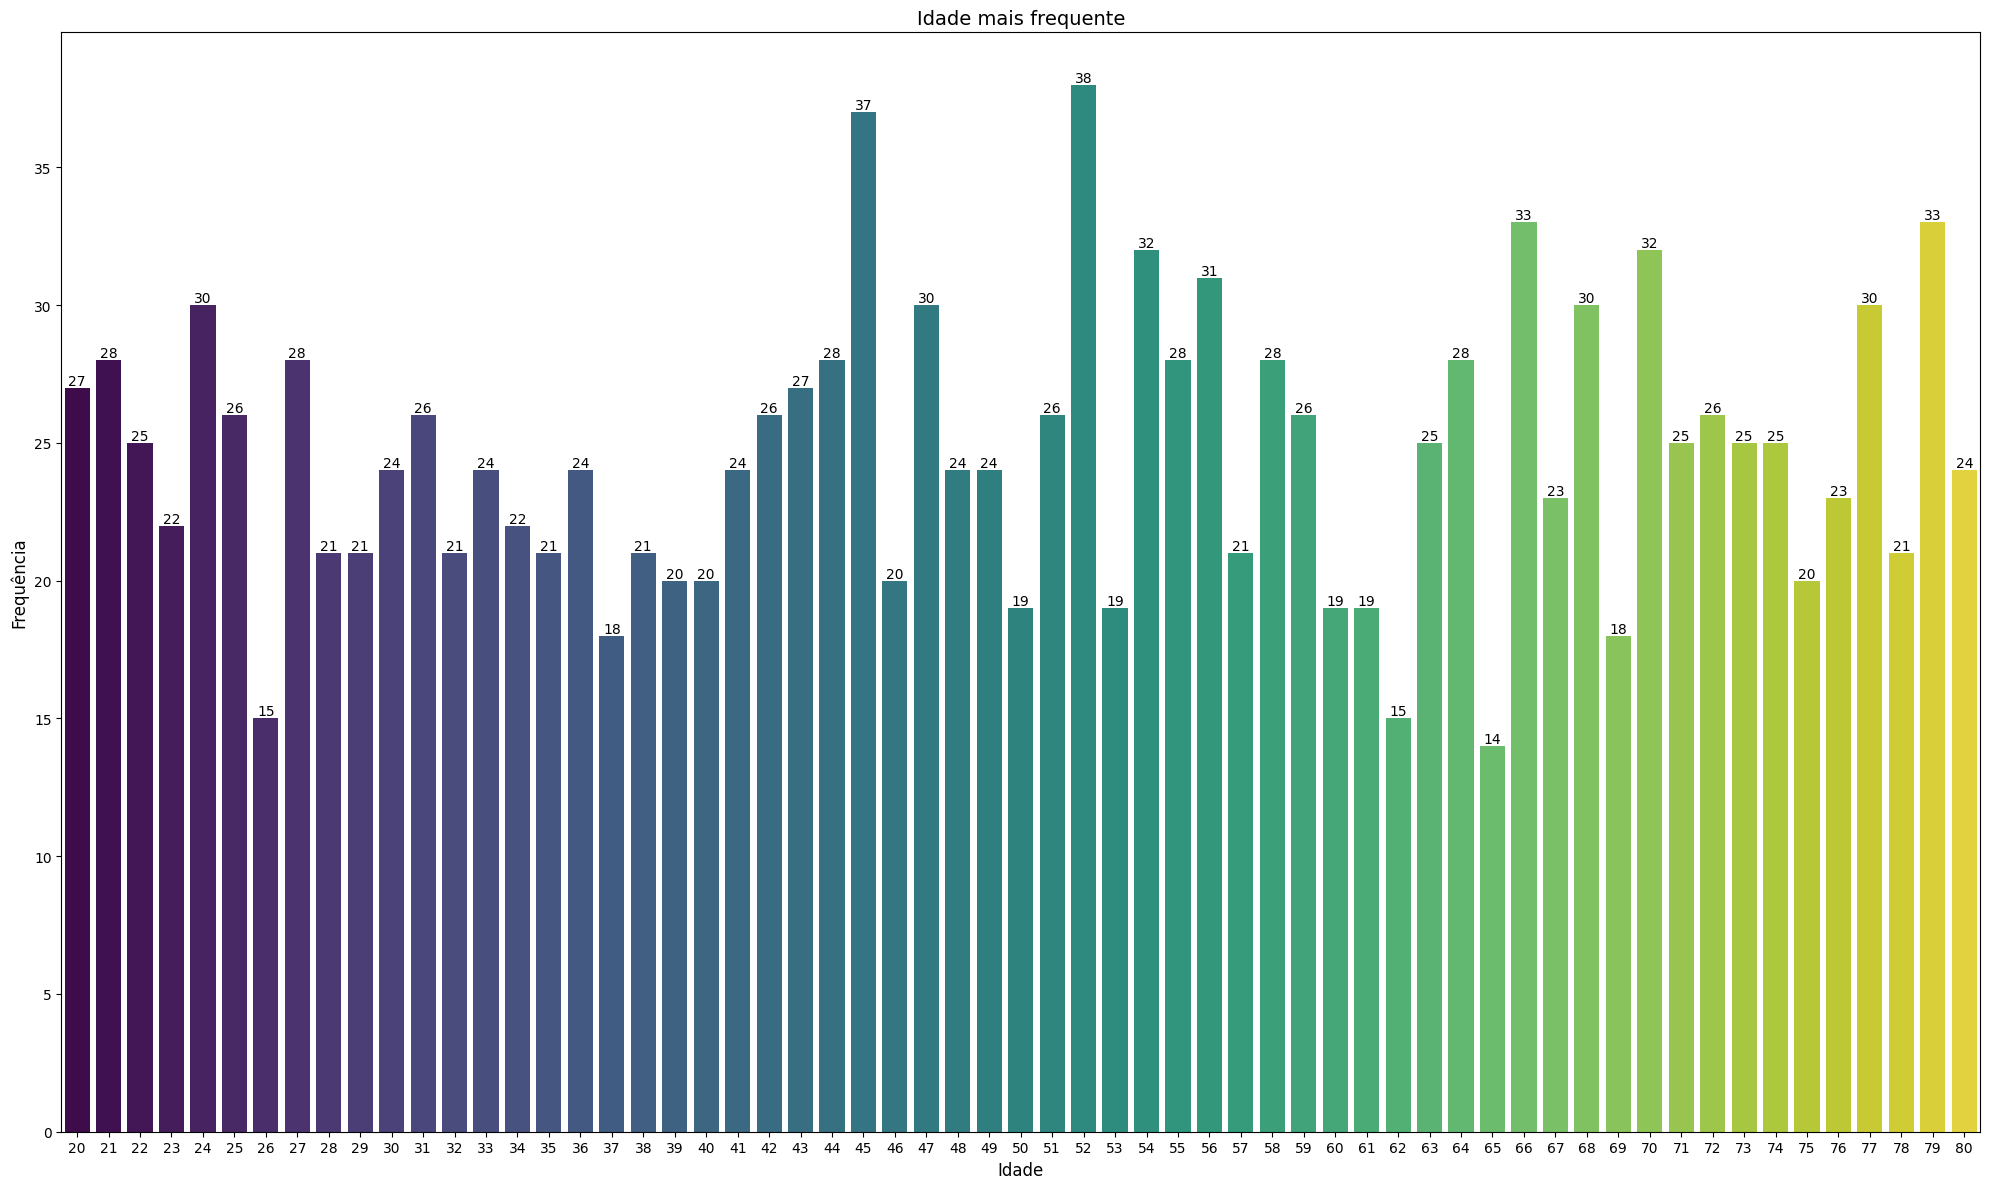

In [138]:
contagem_idade = df['Age'].value_counts().reset_index()
contagem_idade.columns = ['Age', 'Frequência']
 
plt.figure(figsize=(20, 12))
 
ax = sns.barplot(
    x='Age',
    y='Frequência',
    data=contagem_idade,
    palette='viridis',
    hue='Age' # Corrigindo o warning de depreciação
)
 

# Adicionar Rótulos de Dados (Frequência)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
 
plt.title('Idade mais frequente', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=0)
 
# Ocultar a legenda (Correção alternativa ao erro)
if ax.legend_:
    ax.legend_.remove()
 
plt.tight_layout()
plt.show()
 

De acordo com o gráfico exibido, a idade mais frequente apresentada é o 52. Sendo representada 38 vezes.

## 3. Qual a idade mais frequente dos pacientes que foram diagnosticados com câncer?

C:\Users\Aleksander\AppData\Local\Temp\ipykernel_4352\2867007748.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


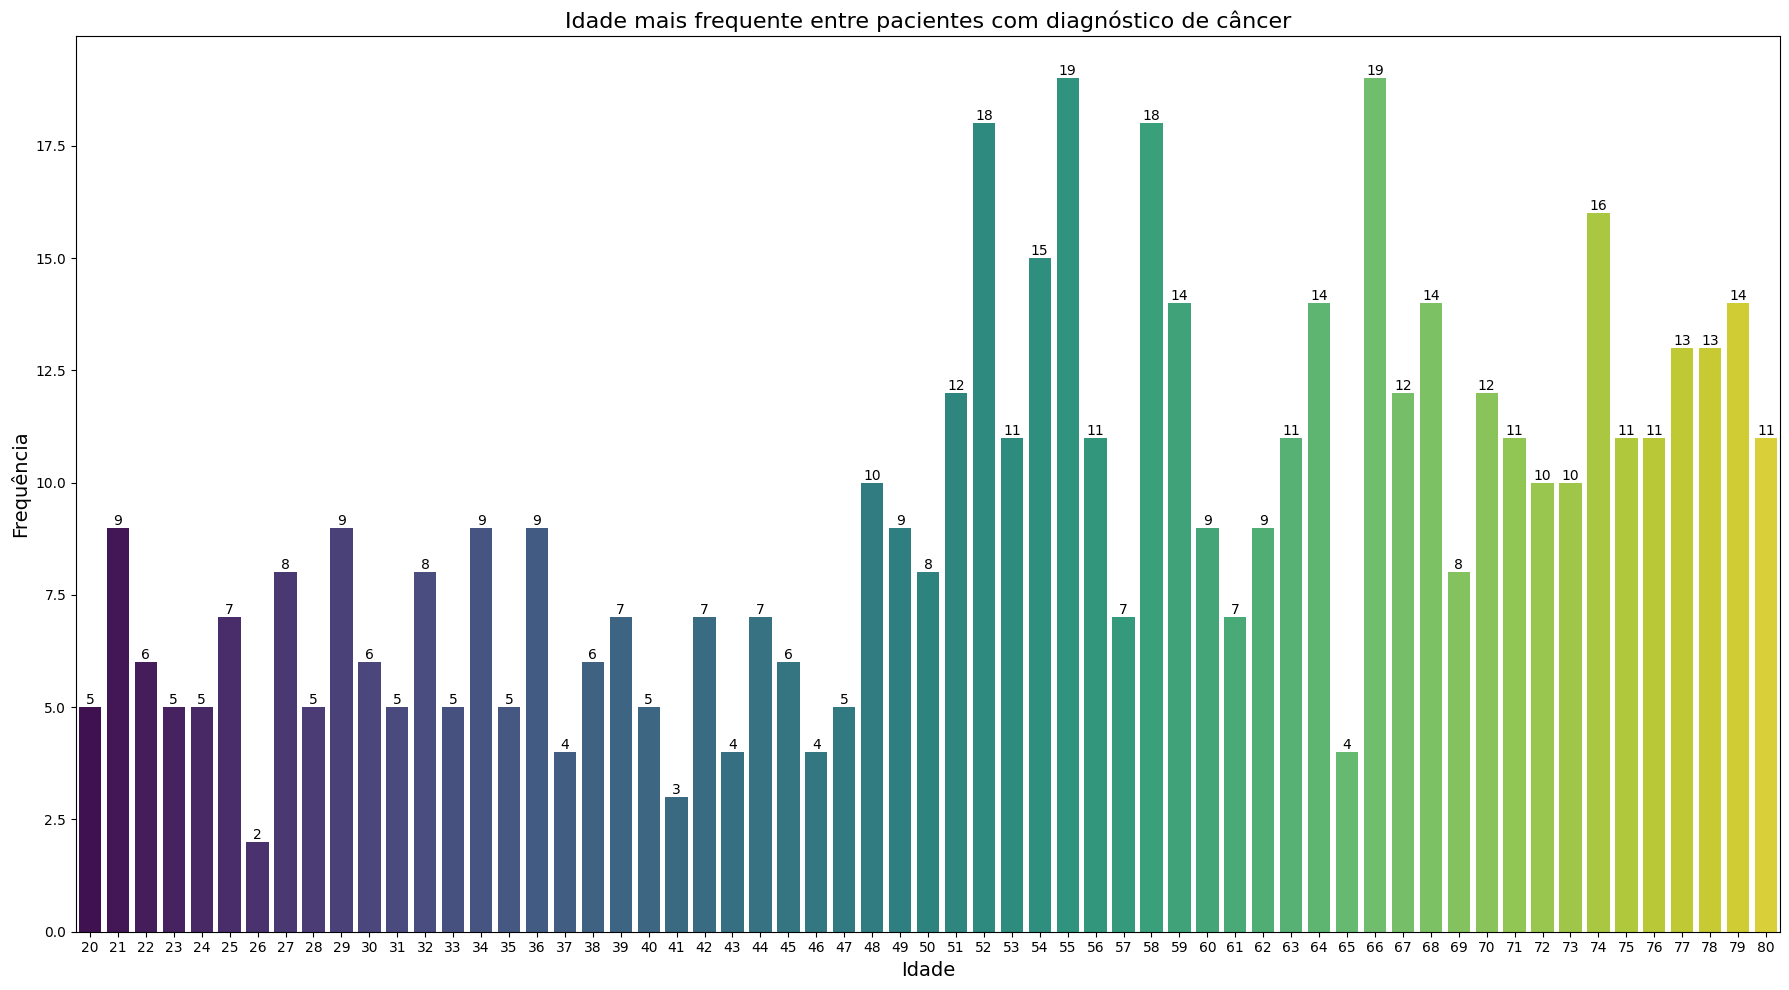

In [139]:
df_cancer = df[df['Diagnosis'] == 1]

contagem = df_cancer['Age'].value_counts().reset_index()
contagem.columns = ['Age', 'Frequência']
contagem = contagem.sort_values(by='Age')  # ordenar para o gráfico ficar correto

plt.figure(figsize=(18, 10))

ax = sns.barplot(
    x='Age',
    y='Frequência',
    data=contagem,
    palette='viridis'
)

# Adicionar rótulos nos gráficos
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.title('Idade mais frequente entre pacientes com diagnóstico de câncer', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [140]:
cancer_sim = df['Diagnosis']==1
df[cancer_sim]['Age'].value_counts()

Age
55    19
66    19
52    18
58    18
74    16
      ..
43     4
65     4
37     4
41     3
26     2
Name: count, Length: 61, dtype: int64

De acordo com o gráfico exibido, podemos notar que as idades com maior frequencia de pessoas diagnosticadas com câncer são 55 e 66 anos. 
Essas idades estão sendo apresentadas 19 vezes

## 4. Fumantes têm mais câncer que não fumantes?

Gráfico salvo como 'taxa_cancer_por_tabagismo.png'


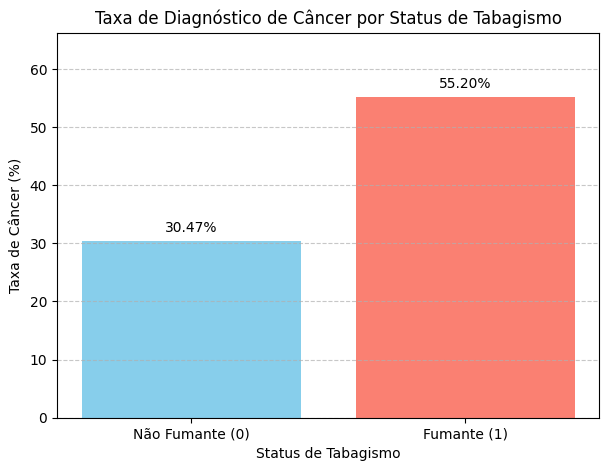

In [141]:

# Calcular a taxa média de 'Diagnosis' (Câncer) para cada grupo de 'Smoking'.
# A média de uma coluna binária (0 e 1) é a proporção de 1s.
cancer_rate = df.groupby('Smoking')['Diagnosis'].mean() * 100 # Multiplica por 100 para percentual
 
# Preparar os rótulos e valores para o gráfico
data_for_plot = pd.DataFrame({
    'Status de Tabagismo': ['Não Fumante (0)', 'Fumante (1)'],
    'Taxa de Câncer (%)': cancer_rate.values
})
 
# ----------------------------------------------------
# 2. GERAÇÃO DO GRÁFICO DE BARRAS
# ----------------------------------------------------
plt.figure(figsize=(7, 5))
bars = plt.bar(
    data_for_plot['Status de Tabagismo'],
    data_for_plot['Taxa de Câncer (%)'],
    color=['skyblue', 'salmon']
)
 
# Adicionar os valores percentuais acima de cada barra (rótulos)
for bar in bars:
    yval = bar.get_height()
    # Verifica se há dados para evitar erro em caso de dataset vazio ou erro de cálculo
    if yval > 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')
 
plt.title('Taxa de Diagnóstico de Câncer por Status de Tabagismo')
plt.xlabel('Status de Tabagismo')
plt.ylabel('Taxa de Câncer (%)')
plt.ylim(0, max(data_for_plot['Taxa de Câncer (%)']) * 1.2 if not data_for_plot.empty else 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
 
# Salvar o gráfico (ou usar plt.show() para exibir em ambientes interativos)
plt.savefig('taxa_cancer_por_tabagismo.png')
print("Gráfico salvo como 'taxa_cancer_por_tabagismo.png'")

De acordo com o gráfico percebe-se que pessoas fumantes possuem maior tendência a desenvolver o câncer.

## 5. Qual a proporção das classes da variável alvo? Tem mais pacientes diagnosticados com câncer ou sem câncer? As classes são desbalanceadas?

Contagem das classes:
Sem Câncer (0)    943
Com Câncer (1)    557
Name: count, dtype: int64

Proporção das classes:
Sem Câncer (0)    62.87%
Com Câncer (1)    37.13%
Name: proportion, dtype: object


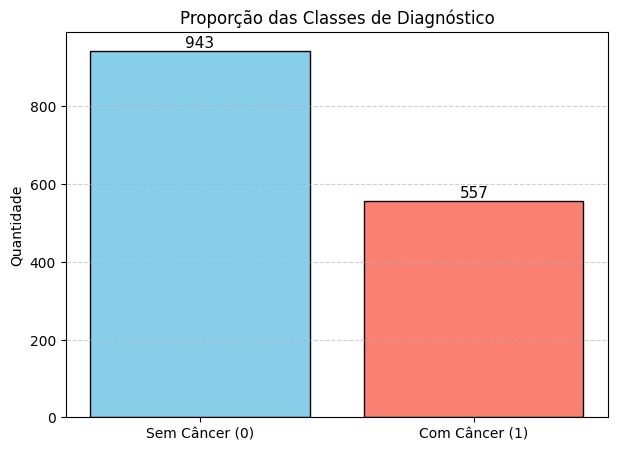

In [142]:
# Carregar dataset
df = pd.read_csv('cancer.csv')
 
# Contagem absoluta das classes
counts = df['Diagnosis'].value_counts().sort_index()
counts.index = ['Sem Câncer (0)', 'Com Câncer (1)']
 
print("Contagem das classes:")
print(counts)
 
# Proporção das classes
proportion = df['Diagnosis'].value_counts(normalize=True).sort_index()
proportion.index = ['Sem Câncer (0)', 'Com Câncer (1)']
 
print("\nProporção das classes:")
print((proportion * 100).round(2).astype(str) + "%")
 
# Gráfico de barras
plt.figure(figsize=(7,5))
plt.bar(counts.index, counts.values, color=['skyblue', 'salmon'], edgecolor='black')
 
plt.title("Proporção das Classes de Diagnóstico")
plt.ylabel("Quantidade")
plt.grid(axis='y', linestyle='--', alpha=0.6)
 
# Adicionar valores acima das barras
for i, v in enumerate(counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=11)
 
plt.show()

A amostragem está desbalanceada, devido a possuir mais pessoas sem câncer do que com câncer.

## 6. Qual a distribuição das variáveis numéricas? Alguma delas apresenta distribuição normal? Ou todas são assimétricas?

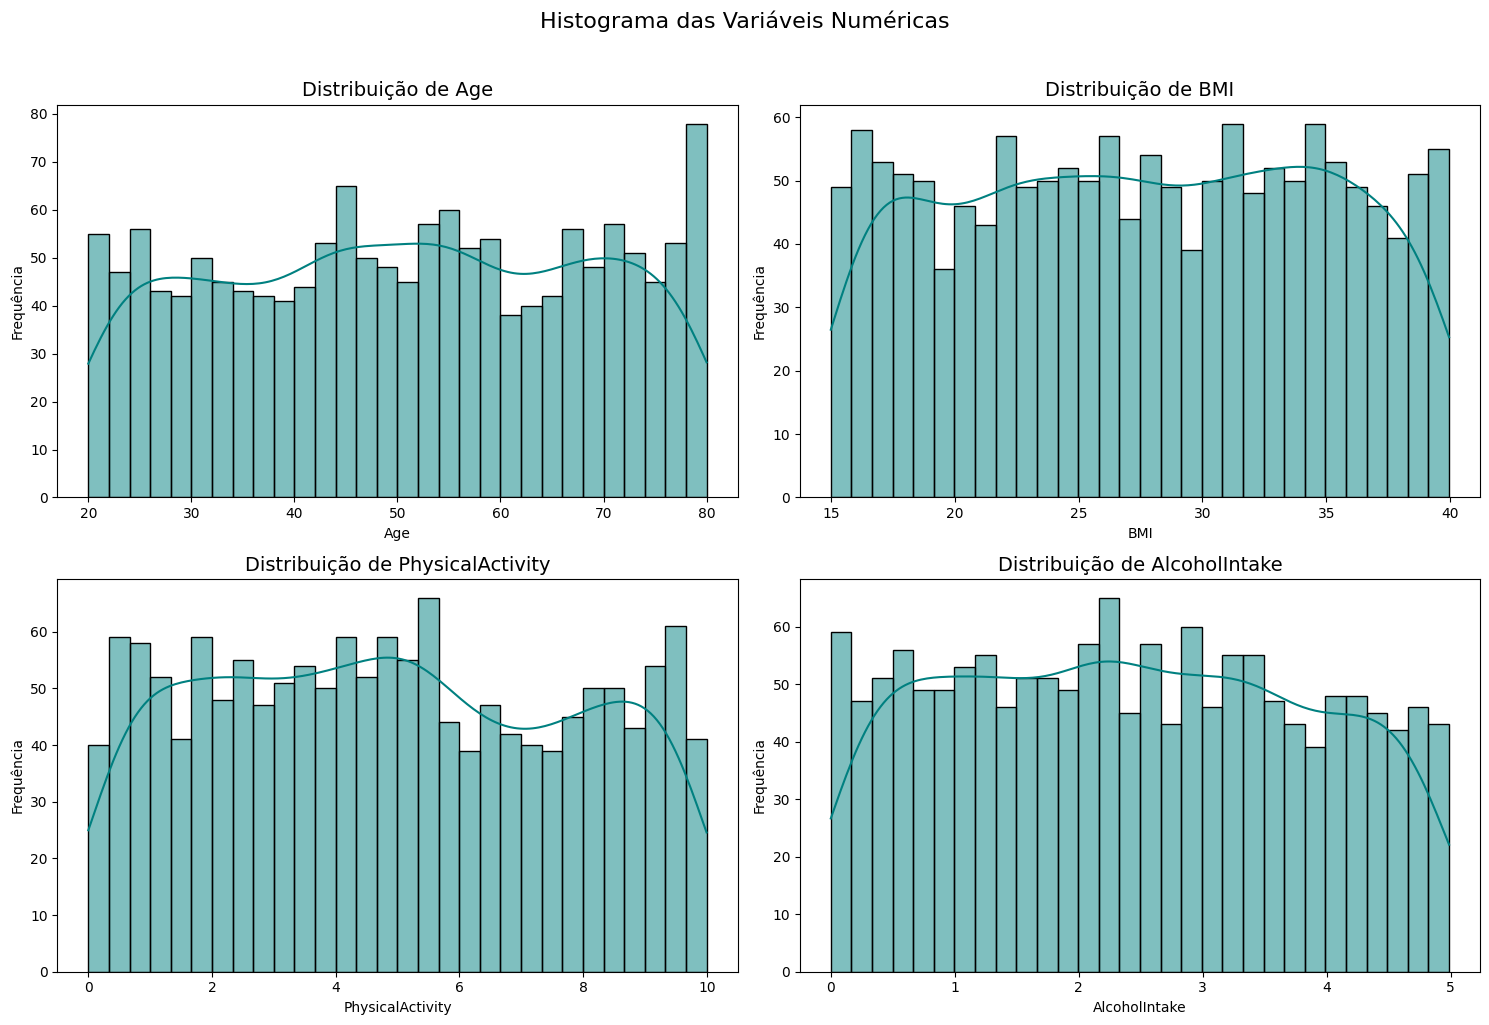

In [143]:
# Colunas a serem excluídas (conforme sua solicitação anterior)
colunas_para_excluir = ['Diagnosis', 'CancerHistory', 'GeneticRisk', 'Smoking', 'Gender']
 
# Criar o DataFrame modificado (apenas variáveis numéricas)
df_modificado = df.drop(columns=colunas_para_excluir, axis=1)
 
# Variáveis para plotar
variaveis_numericas = df_modificado.columns.tolist()
 
# Configuração do Plot
plt.figure(figsize=(15, 10))
plt.suptitle('Histograma das Variáveis Numéricas', fontsize=16, y=1.02)
 
for i, col in enumerate(variaveis_numericas):
    # Cria um subplot (2 linhas, 2 colunas)
    plt.subplot(2, 2, i + 1)
    
    # Gera o histograma com a estimativa de densidade do kernel (KDE)
    # KDE ajuda a visualizar a forma da distribuição
    sns.histplot(df_modificado[col], kde=True, bins=30, color='teal', edgecolor='black')
    
    # Adiciona título e rótulos
    plt.title(f'Distribuição de {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequência')
 
plt.tight_layout()
plt.show()

Podemos observar de acordo com os histograma que os dados são assimétricos.


# ------**Construção do Modelo**--------

## 1. Divisão das variáveis em X e y

In [144]:
X = df['CancerHistory']
y = df['Diagnosis']

## 2. Divisão em treino e teste

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Normalização dos dados

In [146]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1,1))

X_test_scaled = scaler.fit_transform(X_test.values.reshape(-1,1))

## 4. Escolha e Treinamento do Modelo

In [147]:
model = LogisticRegression()

model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## 5. Previsões

In [148]:
y_pred = model.predict(X_test_scaled)

## 6. Avaliação das previsões

In [149]:
# Avaliação das previsões

relatorio = classification_report(y_test, y_pred)

print("Classification Report:")
print(relatorio)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.96      0.81       184
           1       0.85      0.34      0.48       116

    accuracy                           0.72       300
   macro avg       0.77      0.65      0.64       300
weighted avg       0.76      0.72      0.68       300



Com base na métrica de suporte, podemos verificar que as classes estão desbalanceadas. O modelo consegue prever muito bem o valor 0, porém quando vai realizar a previsão do valor 1, deixa de realizar a marcação em mais de 50% dos casos, ou seja, ele marca mais valores 0 que 1.
Se formos levar somente em consideração a acuracia, podemos ter uma avaliação tendenciosa.

# Modelo de Árvore de Decisão

### 1. Divisão das variáveis em X e y

In [150]:
target_col = 'Diagnosis'
X_tree = df.drop(columns=[target_col])
y_tree = df[target_col]


Realizei a divisão das variáveis, tendo como Target a coluna de diagnosticos, e todas outras colunas como variaves X

### 2. Divisão em treino e teste

In [151]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree, y_tree, test_size=0.2, random_state=42
)

### 3. Normalização dos Dados

Utilizando o modelo de árvore decisória não se faz necessário a normalização dos dados, pois de acordo com pesquisas, a normalização não melhora desempenho, não acelera o treino e não muda os splits da árvore.
De acordo com insight do chat-gpt, somente devemos normalizar os dados nos seguintes modelos.

Regressão Logística

KNN

SVM

Redes neurais

PCA

### 4. Escolha e Treinamento do Modelo

In [152]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

model.fit(X_train_tree, y_train_tree)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Realizando a escolha do modelo de árvore de decisão, executando o treinamento utilizando o critério entropy inicialmente. Esse critério visa medir o número de impureza ou incerteza no modelo utilizado, quando entropia estiver muito alta sinal de classes muito misturadas. Se estiver baixa, classe mais organizadas ou puras.

### 5. Previsões

In [153]:
y_pred_tree = model.predict(X_test_tree)

### 6. Avaliação das previsões

In [154]:
relatorio_arvore = classification_report(y_test_tree, y_pred_tree)

print("Classification Report:")
print(relatorio_arvore)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       184
           1       0.84      0.81      0.82       116

    accuracy                           0.87       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.87      0.87      0.87       300



### 7. Responda: Qual modelo obteve a melhor performance? Compare as métricas de precisão, recall, f1 score e acurácia para responder essa pergunta.

Analisando o relatório final, notamos que o modelo retornou uma acuracia de 87%, sendo que a precisão para a classificação 0 é de 88% e para a classificação 1 é 84%.
Com a coluna de recall vemos que 90% das vezes o modelo conseguiu classificar uma pessoa que não possui câncer, contra 81% das marcações para as que possuem.

Com base somente nas métricas sim esse modelo foi melhor na classificação, porém se analisarmos como um todo, foram utilizadas muito mais informações nesse modelo de árvore decisória do que no modelo de regressão logística.


### 8. Agora teste rodar o modelo utilizando os parâmetros de "gini" e "entropy". Qual performou melhor?

In [159]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

model_gini.fit(X_train_tree, y_train_tree)

y_pred_tree = model_gini.predict(X_test_tree)

relatorio_arvore = classification_report(y_test_tree, y_pred_tree)

print("Classification Report:")
print(relatorio_arvore) 

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       184
           1       0.87      0.80      0.83       116

    accuracy                           0.88       300
   macro avg       0.87      0.86      0.87       300
weighted avg       0.88      0.88      0.88       300



Avaliando os dois reports, notamos uma pequena melhora no modelo de decisão utilizando o criterio gini, tivemos uma melhora na acuracia que subiu para 88%.
Já observando o recall, notamos que a classificação 0 teve um acerto de 92%, ou seja, ele aumento em 2% as marcações de pessoas que não possuem câncer